In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset

df = pd.read_csv("netflix_titles.csv")

In [4]:
# Basic info

print(df.shape)
print(df.info())
df.head()

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Handle missing values

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Fill missing categorical values with 'Unknown'

cols_to_fill = ['director', 'cast', 'country', 'date_added', 'rating']
df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')

In [7]:
# Handle missing values

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [8]:
# Convert date_added to datetime

df.rename(columns={'date_added': 'date_time'}, inplace=True)

In [10]:
# Added a default date

df['date_time'] = df['date_time'].fillna(pd.Timestamp('1999-11-15'))

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_time       0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
# Check and fill missing values safely


if 'duration' in df.columns:
    df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

if 'year_added' in df.columns:
    df['year_added'] = df['year_added'].fillna(pd.Timestamp(2023))
else:
    # If 'year_added' doesn't exist, create it
    df['year_added'] = pd.Timestamp(2023)


In [14]:
# Remove duplicates

df.drop_duplicates(inplace=True)

In [15]:
# EDA

C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_14764\1039190034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


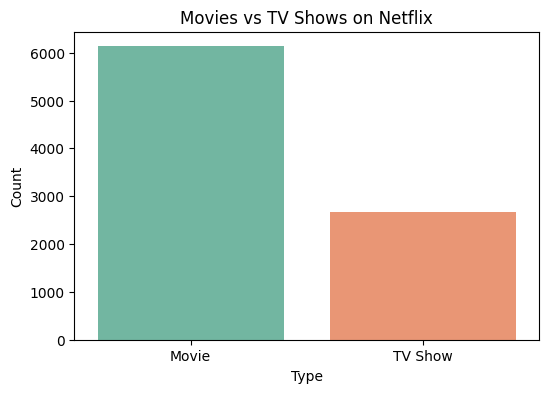

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


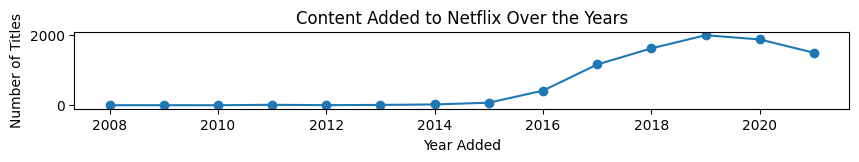

In [17]:
df['year_added'] = pd.to_datetime(df['date_time'],errors='coerce').dt.year
content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,1))
content_by_year.plot(kind='line', marker='o')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_14764\3651630463.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


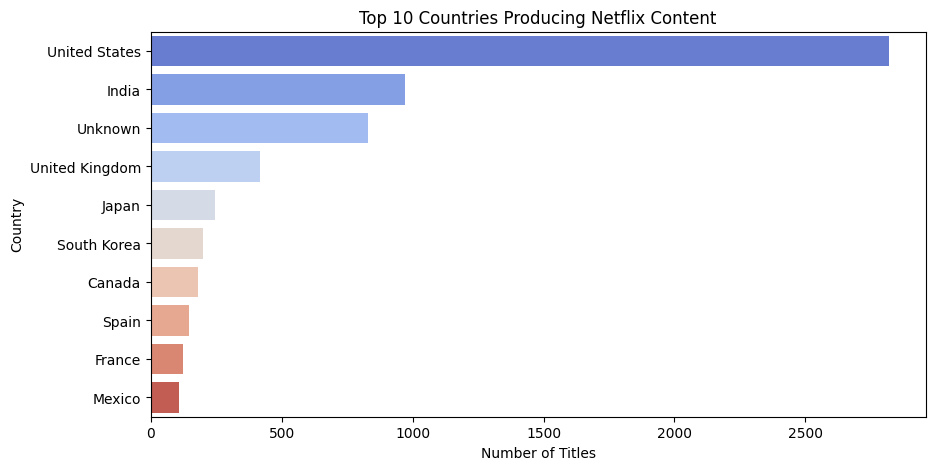

In [18]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_14764\2010387594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')


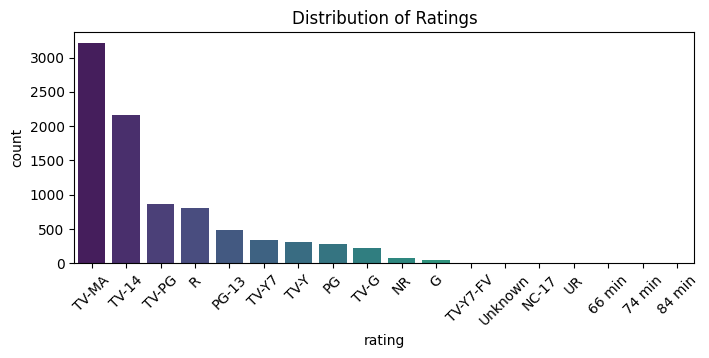

In [19]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title("Distribution of Ratings")
plt.xticks(rotation=45)
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_14764\270185175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df, x='Count', y='Genre', palette='magma')


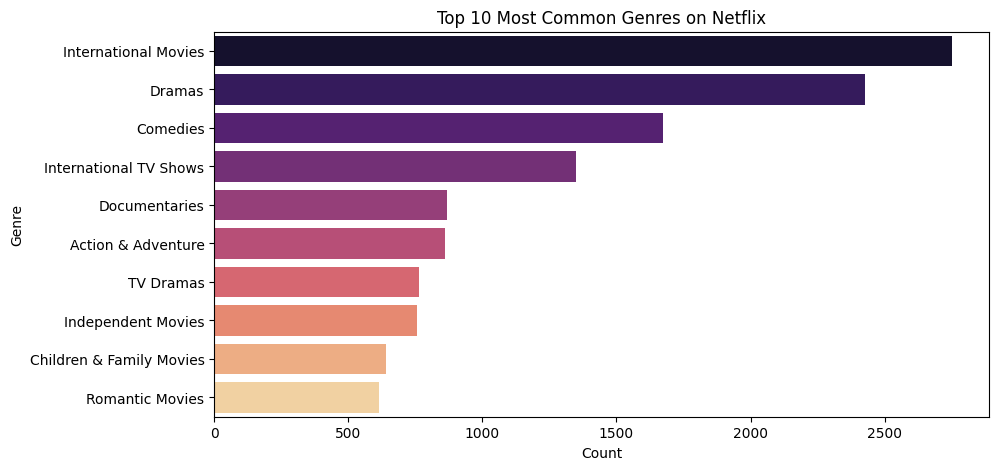

In [20]:
# Split genres and count frequency
from collections import Counter

genres = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
genre_count = Counter([g for sublist in genres for g in sublist]).most_common(10)

genres_df = pd.DataFrame(genre_count, columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=genres_df, x='Count', y='Genre', palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_14764\1829666532.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')


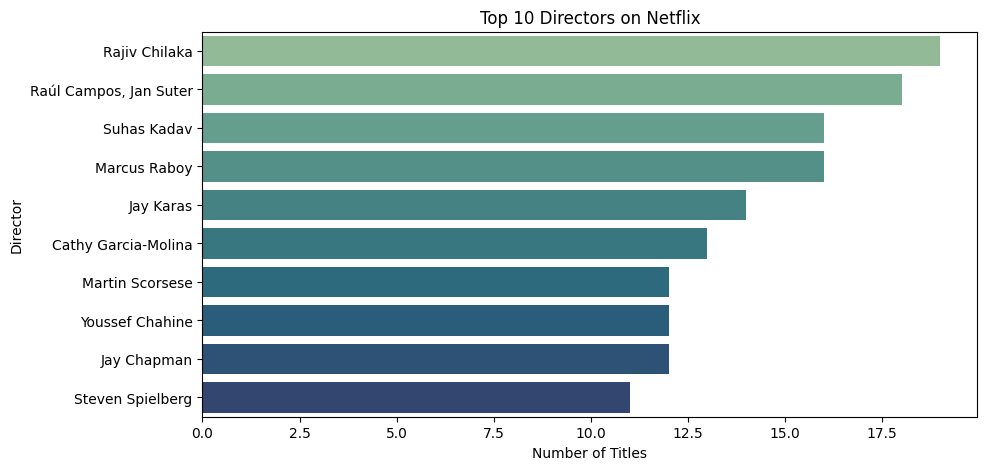

In [21]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()
